In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir('/Users/sebas/projects/metabolomics')
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [4]:
import matplotlib.pyplot as plt
import dill

In [5]:
format_file_unknown = "./notebooks/discovery_search/results/{}_results_analog_discovery_unknwon_compounds.pkl"
format_file_rankings = "./notebooks/discovery_search/results/{}_results_analog_discovery_ranking.pkl"

In [15]:
similarity_names= ['simba','simba_2','spec2vec']

## unknown compounds

In [16]:
results_unknown={}
for s in similarity_names:
    file_path = format_file_unknown.format(s)
    with open(file_path, 'rb') as f:
        results_unknown[s] = dill.load(f)

In [17]:
## plot mces

In [18]:
# Create a box plot
sim_list=[]
labels_list=[]
for s in similarity_names:
    labels_list.append(s)
    sim_retrieved= [m for m in results_unknown[s]['mces_retrieved'] if m is not None]
    sim_list.append(sim_retrieved)

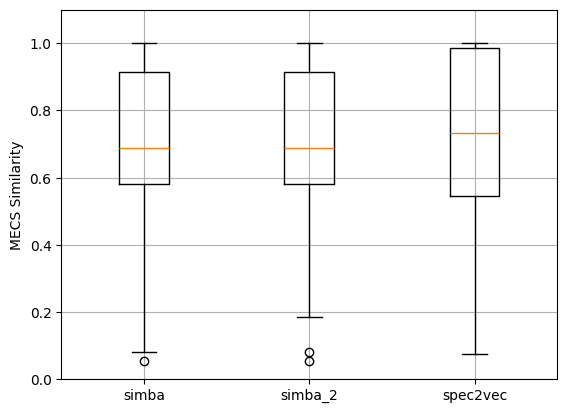

In [19]:
plt.boxplot(sim_list, labels=labels_list)

plt.ylim([0,1.1])
plt.ylabel('MECS Similarity')
plt.title('')
plt.grid()

## Rankings

In [20]:
results_rankings={}
for s in similarity_names:
    file_path = format_file_rankings.format(s)
    with open(file_path, 'rb') as f:
        results_rankings[s] = dill.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './notebooks/discovery_search/results/simba_2_results_analog_discovery_ranking.pkl'

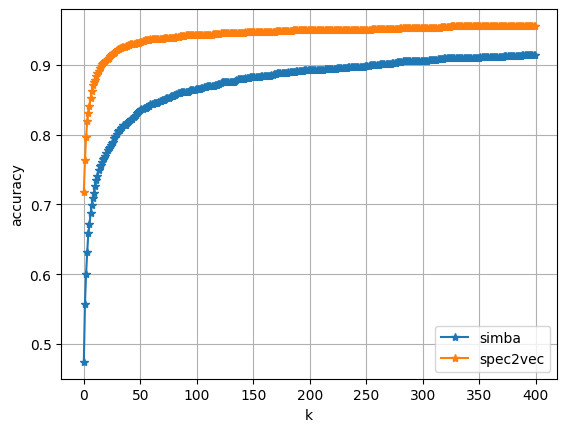

In [12]:
for s in similarity_names:
    plt.plot(results_rankings[s]['rankings_x'], results_rankings[s]['rankings_y'], marker='*', label=s)
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.ylim([0,1])
plt.grid()
plt.legend()